<a href="https://colab.research.google.com/github/ayrna/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carlos Checa Moreno

i02chmoc@uco.es

Este cuaderno está basado en los cuadernos del libro [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

> This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.
> **If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**
> This notebook was generated for TensorFlow 2.6.

# Clasificación y regresión con redes neuronales: glosario

Los casos de uso más habituales con redes neuronales son problemas de clasificación (binaria o multiclase) o regresión:
* Clases: conjunto posible de etiquetas del problema.
* Etiqueta: especifica a una muestra/patrón (la imagen #345 está etiquetada como "gato")
* Clasificación binaria: clasificación con dos categorías excluyentes
* Clasificación multiclase: tenemos varias categorías excluyentes.
* Clasificación multi-etiqueta: a cada muestra se le puede asignar varias etiquetas.
* Regresión escalar: la variable objetivo es una variable continua escalar.
* Regresión vectorial/vector: la variable objetivo es un vector de valores continuos, por ejemplo las coordenadas de un rectángulo donde se encuentra un objeto.
* Lote/batch/mini-bach: un conjunto pequeño de muestras que se procesa simultáneamente (en entrenamiento o en inferencia) por las limitaciones de memoria. Normalmente se expresa en potencias de 2 entre 8 y 128.

## Ejemplo de clasificación binaria: reseñas de películas

### El conjunto de datos IMDB

Conjunto de datos IMDB: un conjunto de 50.000 reseñas **muy polarizadas** de la Internet Movie Database. Se dividen en 25.000 críticas para entrenamiento y 25.000 críticas para test, cada conjunto consta de un 50% de críticas negativas y un 50% de críticas positivas.

Al igual que el conjunto de datos MNIST, el conjunto de datos IMDB está disponible en Keras. Ya ha sido preprocesado: las reseñas (secuencias de palabras) se han convertido en secuencias de números enteros, donde cada número entero representa una palabra específica de un diccionario (reducido). Esto nos permite centrarnos en la construcción, entrenamiento y la evaluación del modelo.

**Cargar el conjunto de datos IMDB**
`num_words=10000` filtra a las palabras más frecuentes en los datos de entrenamiento de las 88.585 disponibles.



In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Las variables `train_data` y `test_data` son una secuencia de índices de las palabras de cada reseña.

Las etiquetas 0 y 1 significan que la reseña es *negativa* o *positiva* respectivamente.

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
train_labels[0]

np.int64(1)

Como nos limitamos a las 10.000 palabras más frecuentes, ningún índice de palabras superará las 10.000:

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decodificar el texto de una reseña**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # Los 3 primeros índices están reservados
print(decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

Ejemplo de una reseña negativa

In [ ]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])
print(decoded_review)

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
? this has to be one of the worst films of the 1990s when 

### Preparación de los datos

Las redes neuronales necesitan trabajar con datos del mismo tamaño. Por tanto , no se pueden introducir directamente listas variables de enteros en la red neuronal y tenemos que **convertir las listas en tensores**. Hay dos maneras de hacerlo:

 * Rellenar las listas para que todas tengan la misma longitud como un tensor entero de la forma (muestras, longitud_máxima), y utilizar una capa que pueda procesar directamente enteros como la capa tipo [`Embedding`](https://keras.io/api/layers/core_layers/embedding/). Ver [Understanding Embedding Layer in Keras](https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce) para ampliar.

* *Multi-hot encode*: Codificar las listas para convertirlas en vectores de 0s y 1s. Por ejemplo, convertir la secuencia [8, 5] en un vector de 10.000 dimensiones que sería todo 0s excepto los índices 8 y 5, que serían 1s. Así ya se podría usar una capa `Dense`, capaz de manejar datos vectoriales de punto flotante, como la primera capa del modelo.

**Codificando las secuencias de enteros como *multi-hot encoding***

Vectorización de los datos de entrada:

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorización de las etiquetas y transformación a `float32`:

In [ ]:
print(type(train_labels))
print(type(train_labels[0]))


<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Construcción del modelo

Despues del preprocesamiento, los datos de entrada son vectores, y las etiquetas son escalares (1s y 0s). Esta es una de las configuraciones de problemas más simples que se pueden encontrar. Un tipo de modelo que funciona bien en este tipo de problemas es una pila simple de capas totalmente conectadas (`Dense`) con activaciones `relu`.

Hay **dos decisiones clave** de arquitectura que se deben tomar sobre tal pila de capas densas:

* Cuántas capas utilizar
* Cuántas unidades elegir para cada capa

En el capítulo 5 del libro ([Fundamentals of Machine Learning](https://livebook.manning.com/book/deep-learning-with-python-second-edition/chapter-5)) se indican más principios y heurísticas para orientar la definición de la arquitectura.

Por el momento utilizaremos la siguiente arquitectura:
* 1 o 2 capas intermedias con varias unidades cada una
* Una tercera capa que emitirá la predicción escalar sobre la opinión de la reseña actual

Nota de traducción: **sentiment != sentimiento**



**Definición del modelo**

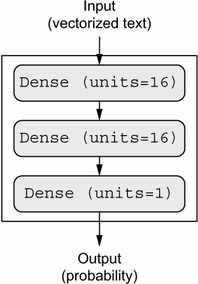



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # Añade capas aquí
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

El primer argumento que se pasa a cada capa Dense es el número de unidades de la capa: la dimensionalidad del espacio de representación de la capa.

Recordemos la implementación de cada capa:

```
output = relu(dot(input, W) + b)
```
Tener 16 unidades significa que la matriz de pesos `W` tendrá forma `(input_dimension, 16)`: el producto escalar con `W` proyectará los datos de entrada en un espacio de representación de 16 dimensiones (y luego añadirá el vector de sesgo `b` y aplicará la operación `relu`).

❓❓❓

¿Qué implicaciones tiene el aumento o reducción de la dimensionalidad de la capa

❓❓❓

Función relu:

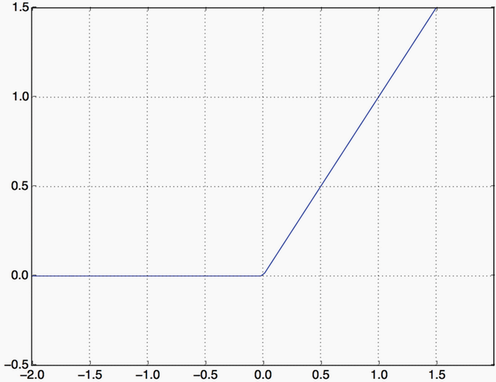

Función sigmoide:

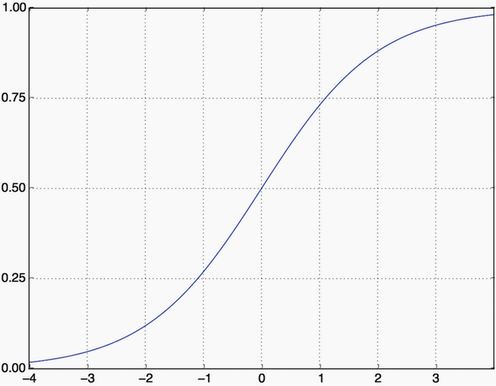

❓❓❓

¿Por qué son necesarias las funciones de activación?

❓❓❓

**Compilación del modelo**

Como función de pérdida alternativamente podríamos usar `mean_squared_error` aunque en principio la entropía cruzada es más adecuada para trabajar con datos probabilísticos ya que mide la distancia entre distribuciones de probabilidad (*Crossentropy*).

Resumen de la entropía cruzada:

* El error cuadrático medio ($MSE$) no es la función natural de error cuando tenemos salidas probabilísticas, ya que trata por igual cualquier diferencia de error.
* Para problemas de clasificación, deberíamos penalizar más los errores cometidos para la clase correcta ($d_j=1$) que para la incorrecta ($d_j=0$).
* La entropía cruzada ($-\ln $ verosimilitud) es más adecuada para problemas de clasificación ya que compara las dos distribuciones de probabilidad:
\begin{equation}
L = - \frac{1}{N\cdot J} \sum_{p=1}^N\left(\sum_{o=1}^J d_{po} \ln(o_{po}) \right)
\end{equation}


❓❓❓

**EJERCICIO:** ¿Cuáles serían las dos distribuciones de probabilidad?

❓❓❓

Las dos distribuciones de probabilidad son:

La distribución real de etiquetas (los valores reales del conjunto de entrenamiento, por ejemplo, 0 o 1 para binario).

La distribución predicha por el modelo (las salidas del modelo, que son probabilidades entre 0 y 1 para cada clase).

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validación del modelo

**Reservar un conjunto de validación**

Nota: en este conjunto de datos se puede hacer porque los suponemos aleatorizados. **Recuerda conceptos como estratificación al dividir el conjunto de datos en entrenamiento, validación y test**❗❗❗.

In [ ]:
print(x_train.shape)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

(8982, 10000)


**Entrenar/ajustar el modelo**

Parámetros:
* Datos de entrenamiento y, opcionalmente, de validación
* Épocas
* Tamaño lotes

El siguiente código debería tardar unos 2 segundos por época:

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6894 - loss: 0.6056 - val_accuracy: 0.8610 - val_loss: 0.4022
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8908 - loss: 0.3463 - val_accuracy: 0.8848 - val_loss: 0.3149
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9200 - loss: 0.2515 - val_accuracy: 0.8887 - val_loss: 0.2827
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9359 - loss: 0.1997 - val_accuracy: 0.8892 - val_loss: 0.2741
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9478 - loss: 0.1602 - val_accuracy: 0.8870 - val_loss: 0.2763
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9552 - loss: 0.1392 - val_accuracy: 0.8864 - val_loss: 0.2826
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9634 - loss: 0.1187 - val_accuracy: 0.8764 - val_loss: 0.3295
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9712 - loss: 0.1007 - val_accuracy: 0.8782 - v

Visualización del modelo:

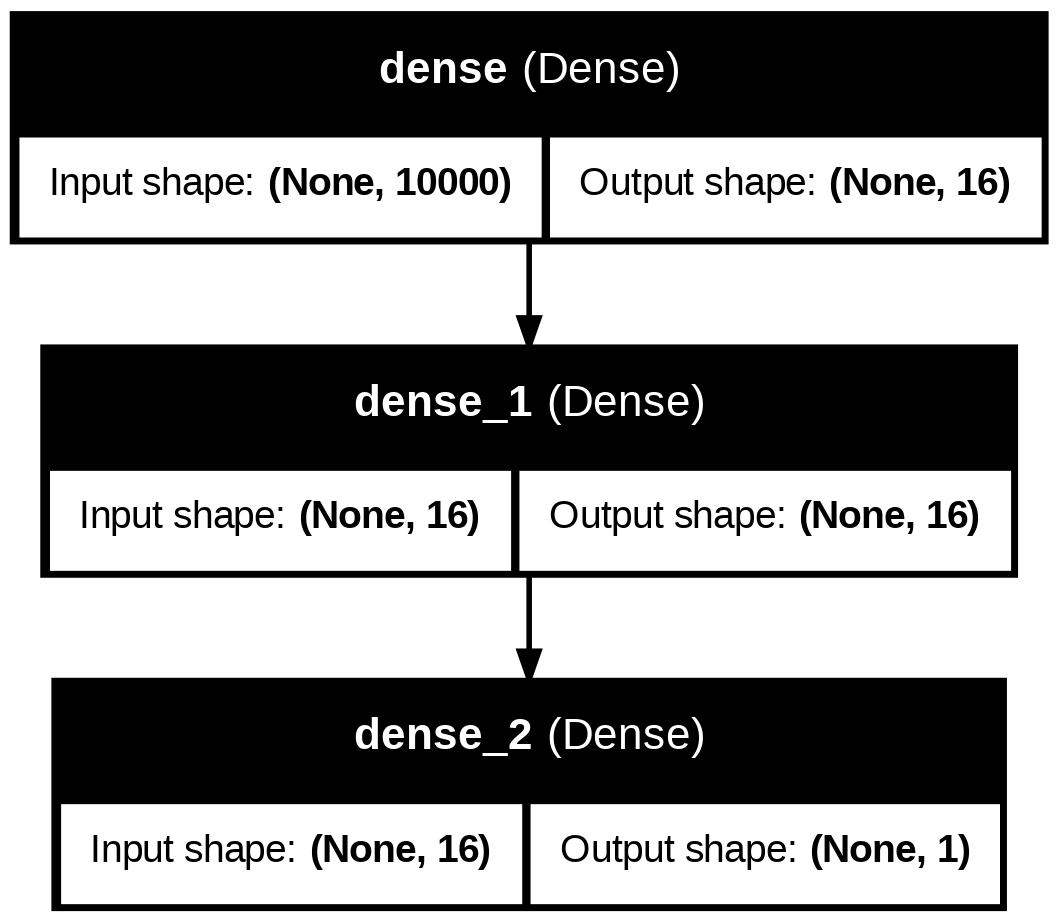

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

❓❓❓

**EJERCICIO:** ¿Por qué no hemos podido visualizar el modelo hasta ahora?

❓❓❓

No se había visualizado el modelo porque aún no se había entrenado completamente.

Diccionario de historial del ajuste. En nuestro caso tiene 4 entradas, una por cada métrica que se ha monitorizado durante el entrenamiento y la validación.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Dibujar la **función de pérdida** en entrenamiento y validación:

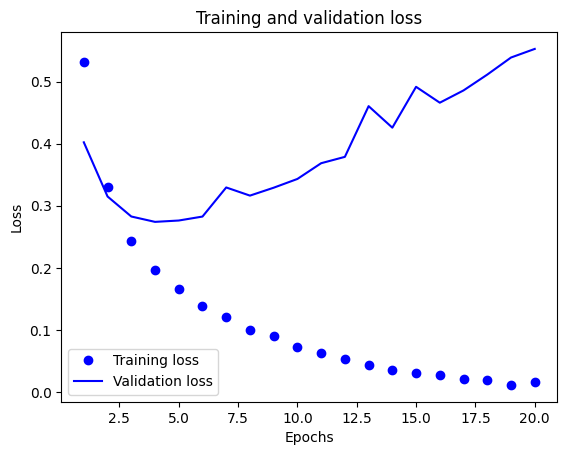

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Dibujar la precisión de entenamiento y validación:

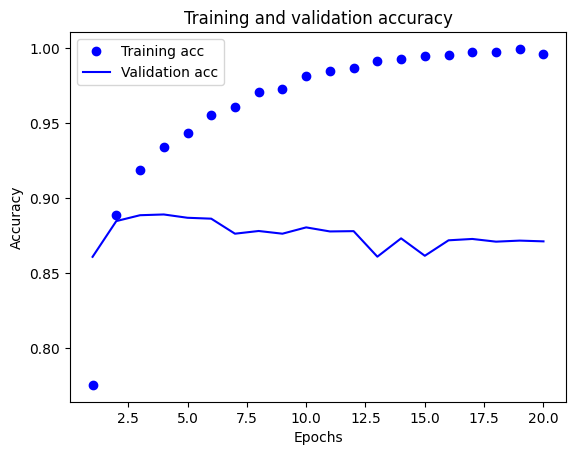

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

❓❓❓

**EJERCICIO**: ¿Qué observas en las gráficas anteriores?
¿Cómo podríamos tratar de arreglar el problema que observas? (incluye código y gráficas que lo solucione y visualice)

❓❓❓

El modelo se está ajustando demasiado a los datos de entrenamiento y no generaliza bien al conjunto de validación. Para solucinarlo he bajado el número de neuronas por capa para simplificar el modelo y eh aumentado el batch_size

**Reentrenar el modelo**

Después de nuestro análisis, podemos volver a reentrenar el modelo con otros parámetros. ¿Qué cambiarías?



```
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(...)
model.fit(...)
results = model.evaluate(x_test, y_test)
```

Haz tus pruebas aquí:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # Añade capas aquí
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.6364 - loss: 0.6448 - val_accuracy: 0.8374 - val_loss: 0.5269
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.8595 - loss: 0.4836 - val_accuracy: 0.8606 - val_loss: 0.4331
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8867 - loss: 0.3924 - val_accuracy: 0.8692 - val_loss: 0.3791
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9030 - loss: 0.3306 - val_accuracy: 0.8811 - val_loss: 0.3383
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9173 - loss: 0.2824 - val_accuracy: 0.8812 - val_loss: 0.3174
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9242 - loss: 0.2515 - val_accuracy: 0.8872 - val_loss: 0.2977
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9279 - loss: 0.2260 - val_accuracy: 0.8886 - val_loss: 0.2876
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9390 - loss: 0.2000 - val_accuracy: 0.8895 -

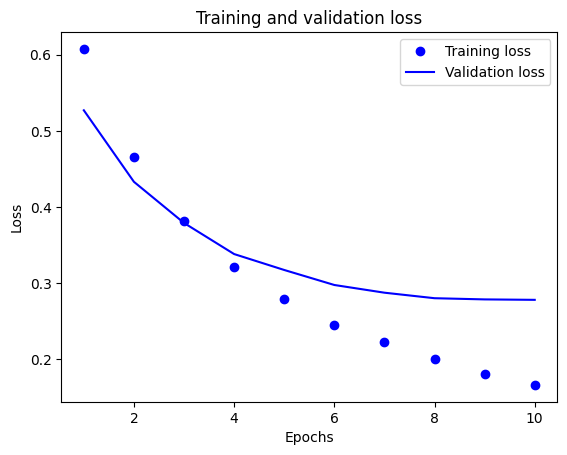

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

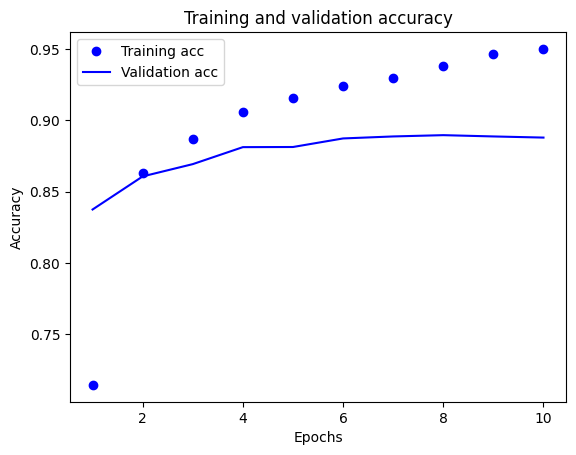

In [ ]:
history_dict = history.history

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Hacer predicciones en datos nuevos

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.26811692],
       [0.99801224],
       [0.9441883 ],
       ...,
       [0.08591092],
       [0.17431173],
       [0.6645973 ]], dtype=float32)

❓❓❓

**EJERCICIO**: Calcula la precisión global y la matriz de confusión en los datos de test (tienes ejemplos en cuadernos anteriores).

❓❓❓

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


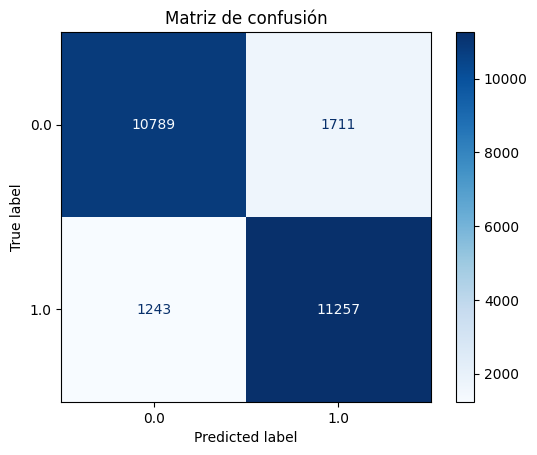

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_prob = model.predict(x_test)
test_pred = (y_pred_prob > 0.5).astype("int32").flatten()
test_labels = y_test

cm = confusion_matrix(test_labels, test_pred)
unique_labels = np.unique(test_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.show()

### Amplía experimentos:

Los siguientes experimentos te ayudarán a convencerte de que las elecciones de arquitectura que has hecho son bastante razonables, aunque todavía se puede mejorar:

* Hemos utilizado dos capas de representación antes de la capa de clasificación final. Prueba a utilizar una o tres capas ocultas y observa cómo afecta esto a la validación y a la  recisión de la prueba.
* Prueba a utilizar capas con más o menos unidades: 32 unidades, 64 unidades, etc.
* Prueba a utilizar la función de pérdida `mse` en lugar de `binary_crossentropy`.
* Prueba a utilizar la función de activación `tanh` en lugar de `relu`.


❓❓❓

**EJERCICIO**: Como hicimos anterioremente, trata de recoger todo el código del notebook en una sola celda que te permita experimental fácilmente con diferentes arquitecturas y parámetros. Puedes asumir que los datos están ya cargados y procesados y centrarte en los experimentos. Necesitarás:
1. Definir el modelo
1. Compilar el modelo
1. Ajustar el modelo
1. Dibujar gráfica de convergencia
1. Calcular la precisión en test

❓❓❓


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.6468 - loss: 0.6573 - val_accuracy: 0.8337 - val_loss: 0.5459
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8665 - loss: 0.5079 - val_accuracy: 0.8618 - val_loss: 0.4529
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8867 - loss: 0.4136 - val_accuracy: 0.8708 - val_loss: 0.3976
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9094 - loss: 0.3481 - val_accuracy: 0.8809 - val_loss: 0.3559
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9131 - loss: 0.3078 - val_accuracy: 0.8844 - val_loss: 0.3289
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9240 - loss: 0.2692 - val_accuracy: 0.8835 - val_loss: 0.3141
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9333 - loss: 0.2412 - val_accuracy: 0.8845 - val_loss: 0.3017
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9337 - loss: 0.2217 - val_accuracy: 0.8865 -

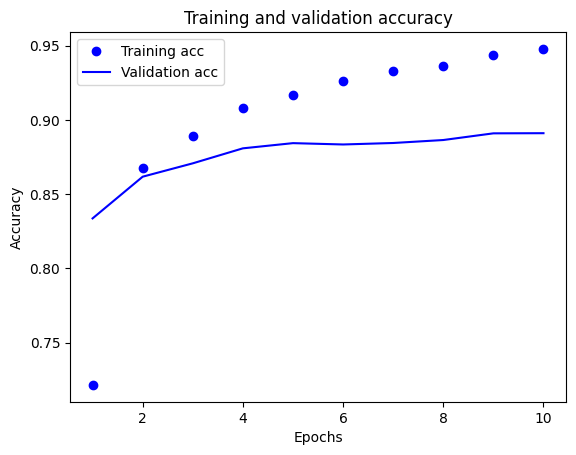

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8804 - loss: 0.2941
Test loss: 0.29453593492507935
Test accuracy: 0.882319986820221


In [ ]:
# Definir el modelo
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilar el modelo
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Ajustar el modelo
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

# Dibujar gráfica de convergencia
history_dict = history.history

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Calcular la precisión en test
results = model.evaluate(x_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

### Resumen
* Preprocesamiento
* Las pilas de capas `Dense` con `relu` pueden resolver muchos problemas
* En clasificación binaria siempre terminamos el modelo con una capa `Dense` y activación `sigmoid`.
* Por tanto usamos `binary_crossentropy`.
* Importancia de monitorizar el rendimiento.

## Clasificación multiclase: clasificación de noticias

* Clasificación binaria: categorías mútuamente exclusivas
* Clasificación multiclase
 * Clasificación multiclase de etiqueta única
 * Clasificación multiclase multi-etiqueta

### Conjunto de datos Reuters

Es un conjunto de datos multi-etiqueta donde cada etiqueta representa un *tema* asociado a una noticia. Hay 46 temas diferentes con distinto nivel de representación.

Se puede trabajar como etiqueta simple considerando un tema único principal.

**Cargar el conjunto de datos Reuters**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(len(train_data))
print(len(test_data))
print(train_data[10])
print(train_labels[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


**Descodificar las noticias a texto**

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print(decoded_newswire)
print(train_labels[0])
print(train_labels[3])


? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3
4


### Preparación de los datos

**Codificación de los datos**

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(8982, 10000)


**Codificación de las etiquetas**

Utilizaremos *one-hot encoding* también conocido como *codificación categórica*. Podemos usar la función anterior aunque en realidad Keras, scikit-learn y otros suelen tener funciones para esto:


In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Veamos el resultado:

In [10]:
print(train_labels.shape)
print(test_labels.shape)
print(y_train.shape)
print(y_test.shape)

(8982,)
(2246,)
(8982, 46)
(2246, 46)


### Construcción del modelo

**Definición del modelo**

❓❓❓ **EJERCICIO:** ¿Qué valor pondrías en HHH y en XXX?❓❓❓

```
model = keras.Sequential([
    layers.Dense(HHH, activation="relu"),
    layers.Dense(HHH, activation="relu"),
    layers.Dense(XXX, activation="softmax")
])
```

In [15]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compilación del modelo**

❓❓❓ **EJERCICIO:** ¿Qué función de pérdida pondrías (ver <https://keras.io/api/losses/>)?❓❓❓

In [16]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validación del diseño

**Conjunto de validación**

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Entrenamiento/ajuste del modelo**

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.4188 - loss: 3.0332 - val_accuracy: 0.6690 - val_loss: 1.5849
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6986 - loss: 1.4207 - val_accuracy: 0.7340 - val_loss: 1.2257
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7763 - loss: 1.0286 - val_accuracy: 0.7800 - val_loss: 1.0569
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8260 - loss: 0.8136 - val_accuracy: 0.8010 - val_loss: 0.9713
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8636 - loss: 0.6482 - val_accuracy: 0.8080 - val_loss: 0.9180
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.8878 - loss: 0.5244 - val_accuracy: 0.8240 - val_loss: 0.8634
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.9163 - loss: 0.4122 - val_accuracy: 0.8190 - val_loss: 0.8537
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9252 - loss: 0.3403 - val_accuracy: 0.8230 -

**Dibujar la pérdida de entrenamiento y validación**

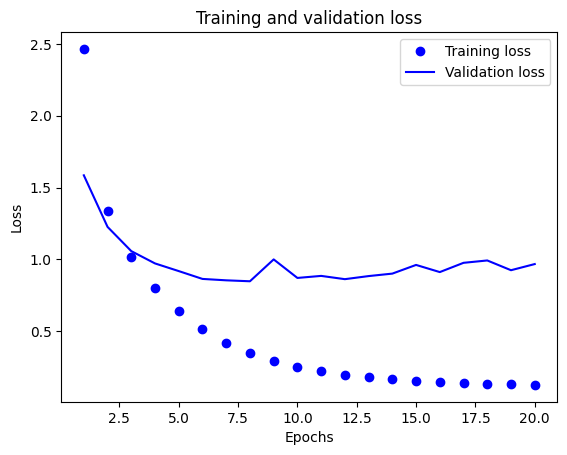

In [19]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Dibujar la precisión en entrenamiento y validación**



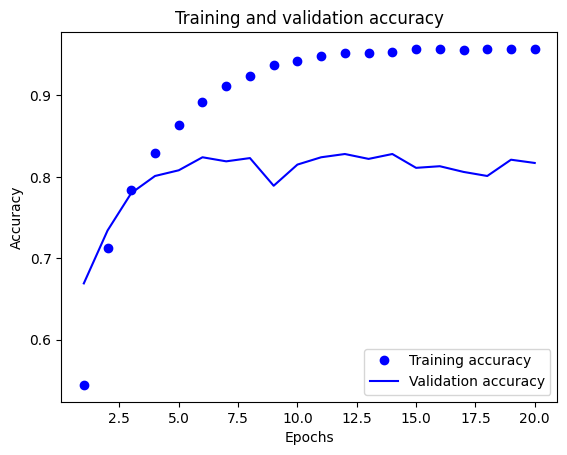

In [20]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

❓❓❓
**EJERCICIO:**
* ¿Detectas sobreajuste?¿Cómo podemos mitigarlo?
* ¿Qué pasa si usas 1 o 3 capas y con distinto número de neuronas (e.j. 8,64,128)?
**Reentrenemos desde cero con nuestras conclusiones**
❓❓❓

Sí detecto un ligero sobreajuste, pues a partir  de las 7 épocas hay demasiada diferencia entre el accuracy y loss del modelo con los datos de validación y entrenamiento.

In [35]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(type(x_train))
print(x_train.shape)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(train_labels.shape)
print(test_labels.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(8982, 10000)
(8982,)
(2246,)
(8982, 46)
(2246, 46)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.1862 - loss: 3.5320 - val_accuracy: 0.5360 - val_loss: 2.2367
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.5140 - loss: 2.2399 - val_accuracy: 0.6140 - val_loss: 1.6490
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.5981 - loss: 1.7196 - val_accuracy: 0.6670 - val_loss: 1.4353
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.6503 - loss: 1.5198 - val_accuracy: 0.6920 - val_loss: 1.3263
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.6914 - loss: 1.3626 - val_accuracy: 0.7140 - val_loss: 1.2435
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.7071 - loss: 1.2608 - val_accuracy: 0.7340 - val_loss: 1.1738
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.7276 - loss: 1.1520 - val_accuracy: 0.7500 - val_loss: 1.1225
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.7455 - loss: 1.0702 - val_accuracy: 0.7600 - val_loss:

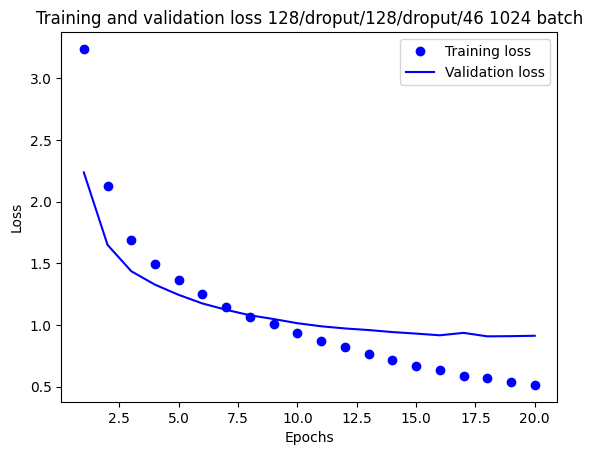

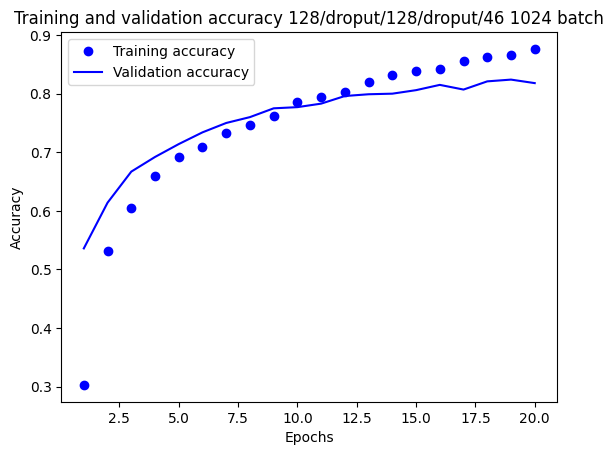



----------  Test  ----------
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7984 - loss: 0.9423
[0.9780909419059753, 0.784060537815094]


In [56]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="CategoricalCrossentropy",
              metrics=["accuracy"])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss 64/64/64/46")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy 64/64/64/46")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\n");
print("-"*10, " Test ","-"*10)
results = model.evaluate(x_test, y_test)
print(results)

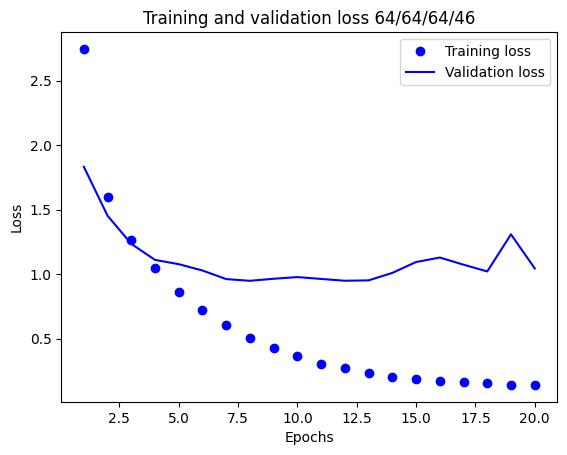
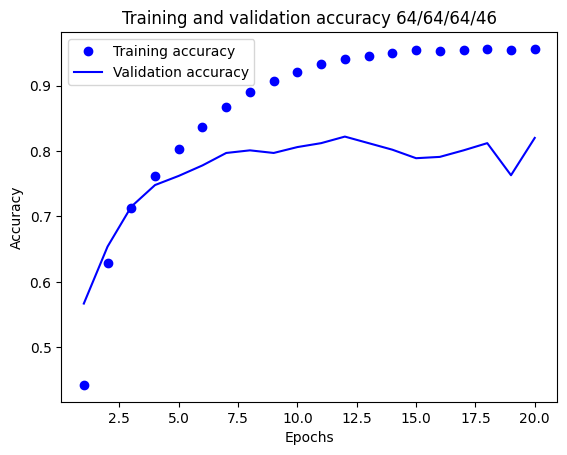

Test: [1.1742750406265259, 0.784060537815094]

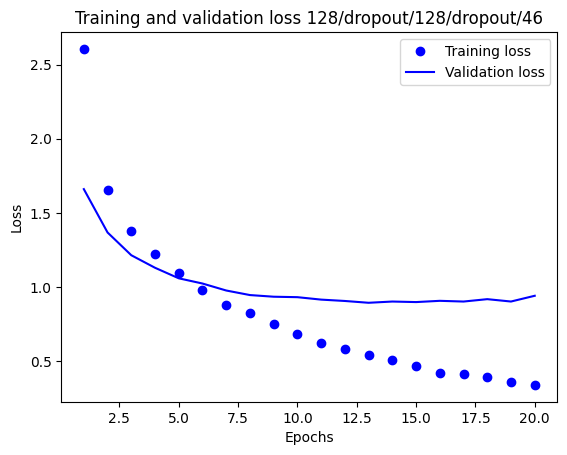

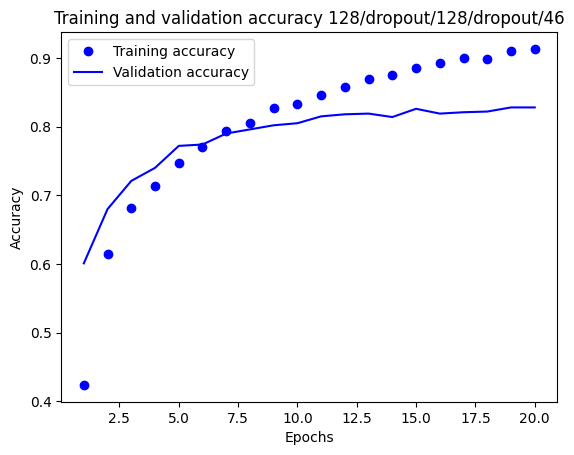

Test: [1.0808125734329224, 0.7987533211708069]

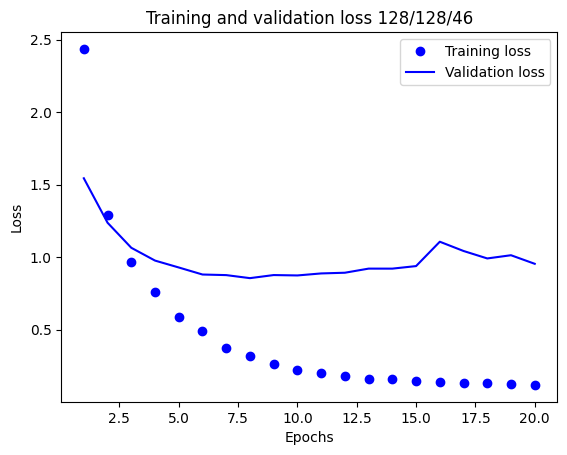
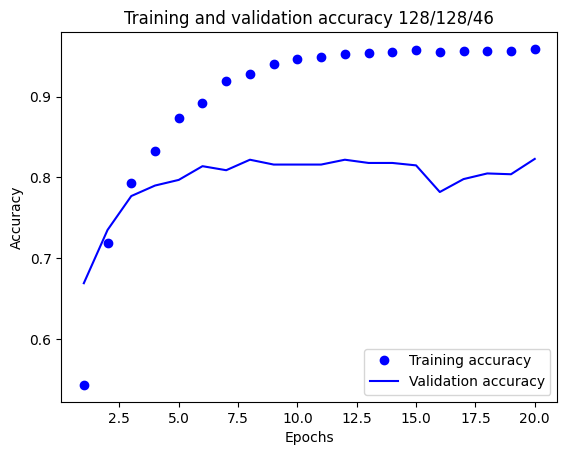

Test: [1.0680865049362183, 0.792965292930603]

Evaluamos en test:

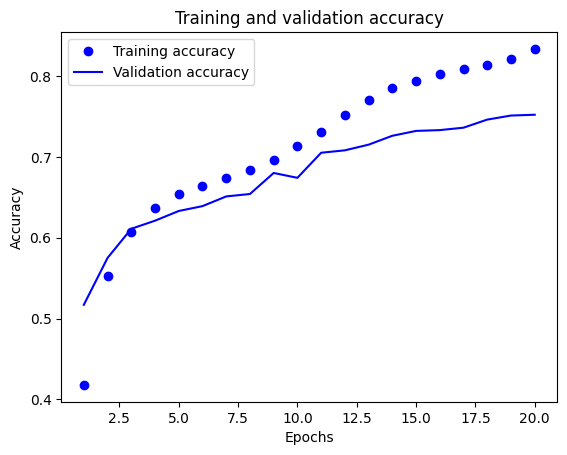

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7299 - loss: 1.1143


[1.150956392288208, 0.7230632305145264]

In [24]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
results

¿Cómo interpretamos estos resultados?¿Son buenos o malos? Para esto tenemos que estimar el rendimiento base. El rendimiento base en un problema binario perfectamente balanceado sería del 50% (un clasificador aleatorio). ¿Cuál es en nuestro caso?

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.17586821015138024)

### Generar predicciones/salidas sobre datos nuevos

In [26]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [27]:
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

np.float32(1.0)

In [29]:
np.argmax(predictions[0])

np.int64(3)

### Otra forma de codificar las etiquetas y la pérdida

Como tensor de enteros:

In [30]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Esta variante necesita una función de pérdida diferente:

In [31]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### La importancia de tener capas intermedias suficientemente grandes

grandes ➡ anchas

Antes hemos mencionado que, como la capa de salida tiene 46 dimensiones, hay que evitar las capas intermedias con muchas menos de 46 unidades. Veamos qué sucede cuando introducimos un “cuello de botella” de información al tener capas intermedias que son significativamente menos de 46 dimensiones: por ejemplo, de 4 dimensiones.

**Ejemplo de modelo con un cuello de botella**

In [32]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2490 - loss: 3.2256 - val_accuracy: 0.5540 - val_loss: 2.0366
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5563 - loss: 1.8576 - val_accuracy: 0.5760 - val_loss: 1.6200
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5938 - loss: 1.4901 - val_accuracy: 0.5940 - val_loss: 1.5114
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6127 - loss: 1.3345 - val_accuracy: 0.6080 - val_loss: 1.4559
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6291 - loss: 1.2569 - val_accuracy: 0.6150 - val_loss: 1.4337
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6598 - loss: 1.1581 - val_accuracy: 0.6570 - val_loss: 1.4240
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7116 - loss: 1.0836 - val_accuracy: 0.6740 - val_loss: 1.3856
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7359 - loss: 0.9834 - val_accuracy: 0.6780 - v

### Experimentos adicionales

❓❓❓
**EJERCICIO:**

Después de los experimentos: ¿Cuáles son los parámetros óptimos de tu modelo?

❓❓❓

```
layers.Dense(128, activation="relu"),
layers.Dropout(0.5),
layers.Dense(128, activation="relu"),
layers.Dropout(0.5),
layers.Dense(46, activation="softmax")

optimizer="rmsprop",        
loss="CategoricalCrossentropy",
metrics=["accuracy"])

epochs=20,
batch_size=512,
```

Test: [1.0808125734329224, 0.7987533211708069]

### Resumen

* ¿Cuántas neuronas de salida tienen los modelos anteriores?
* ¿Cuándo utilizamos la función softmax y cuándo la sigmoide?
* ¿Qué opciones tenemos para representar las etiquetas en un problema multiclase?
* ¿Qué principios podemos seguir para diseñar la arquitectura de la red?

## Ejemplo de regresión: predicción de precios inmobiliarios

### Base de datos Boston Housing Price


Otro tipo común de problema de aprendizaje automático es la **regresión**, que consiste en predecir un valor continuo en lugar de una etiqueta discreta: por ejemplo, predecir la temperatura mañana, dados los datos meteorológicos.

En esta sección, intentaremos predecir el precio medio de las viviendas en un determinado barrio de Boston a mediados de la década de 1970, a partir de datos sobre el barrio en aquel momento, como el índice de criminalidad, el tipo del impuesto local sobre bienes inmuebles, etc. En este caso cada una de las características tiene una escala diferente lo que nos *obligará* a normalizar los datos.

**Carga de Boston housing dataset**

In [57]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [58]:
train_data.shape

(404, 13)

In [59]:
test_data.shape

(102, 13)

In [60]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preprocesado

**Normalizado o estandarizado de datos**

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

> Standardize features by removing the mean and scaling to unit variance.
> The standard score of a sample x is calculated as:
> `z = (x - u) / s`
> where u is the mean of the training samples or zero if with_mean=False, and s > is the standard deviation of the training samples or one if with_std=False.
> Centering and scaling happen independently on each feature by computing the > relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.



In [61]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data) # IMPORTANTE: Los datos de test se escalan con los datos de media y desviación de train

### Construcción del modelo

**Definition**

Al tener pocos patrones vamos a usar un modelo más pequeño para mitigar el posible sobreentrenamiento.

Esta función será útil para el diseño experimental KFold.

En el caso de regresión, es habitual no tener una función de transferencia en la capa de salida para no restringir los valores de salida.

In [62]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validando el diseño con validación K-fold

**K-fold validation**

In [63]:
from sklearn.model_selection import KFold

k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kf.split(train_data):
  X_train, X_val = train_data[train_index], train_data[val_index]
  y_train, y_val = train_targets[train_index], train_targets[val_index]

  # Build and compile the model
  model = build_model()

  # Train the model
  model.fit(X_train, y_train, epochs=num_epochs, batch_size=16, verbose=0)

  # Evaluate the model
  val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)

  all_scores.append(val_mae)

In [64]:
all_scores

[3.4555022716522217, 3.3770127296447754, 3.243746519088745, 3.1166574954986572]

In [65]:
import numpy as np
np.mean(all_scores)

np.float64(3.2982297539711)

**Guardar los logs de validación de cada fold**

In [66]:
from sklearn.model_selection import KFold

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100 # aumentar a 500
all_mae_histories = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kf.split(train_data):
  X_train, X_val = train_data[train_index], train_data[val_index]
  y_train, y_val = train_targets[train_index], train_targets[val_index]

  # Build and compile the model
  model = build_model()

  # Train the model
  history = model.fit(X_train, y_train, epochs=num_epochs,
                      validation_data=(X_val, y_val),
                      batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)


**Procesamos el historial**

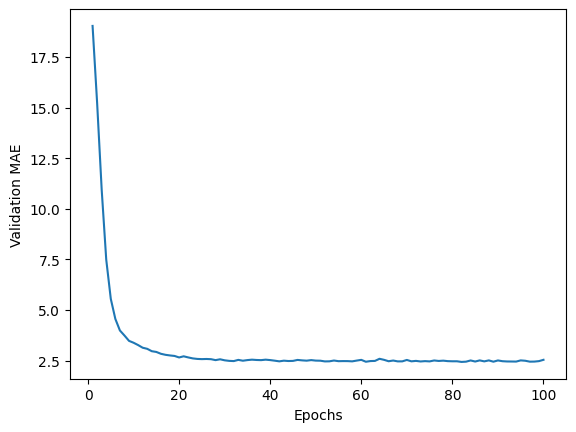

In [67]:
import matplotlib.pyplot as plt
import numpy as np

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Dibujar la puntuación de validación excluyendo los 10 primeros puntos**

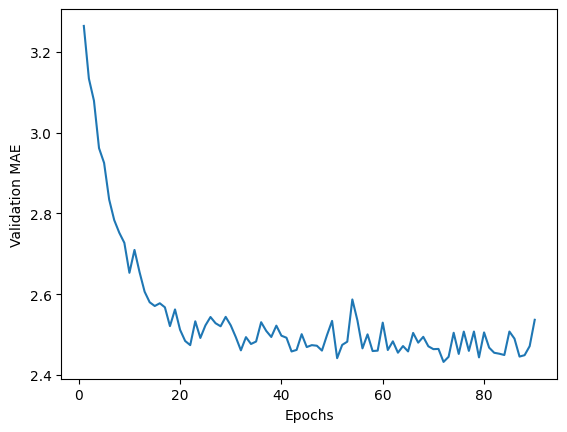

In [68]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Entrenamos el modelo final**

In [69]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.9057 - mae: 2.3004 


In [70]:
test_mae_score

2.5083086490631104

### Predicciones con datos nuevos

In [71]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([8.448062], dtype=float32)